In [1]:
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vaccaleibundgut import *
from Functions import *
from scipy.optimize import minimize

In [2]:
pklf = 'high_SN_Ic_HostXT_peak_covered_low_redshift.pkl'
selected_lc = pkl.load(open(pklf, "rb"))

In [19]:
# Test fitting algorithms to a single light curve

keys = np.asarray(selected_lc.keys())
ID = '2'
b = 'r'
t = selected_lc[ID][b]['t']
f = selected_lc[ID][b]['f']
ferr = selected_lc[ID][b]['ferr']

t = t[f>0]
ferr = ferr[f>0]
f = f[f>0]

if len(f) == 0:
    print(ID)

m = 27.5 - 2.5*np.log10(f) #-2.5*np.log10(f/(10**(-0.4*27.5)))
median = np.nanmedian(m)
m = m- median
merr = 2.5 / np.log(10) * ferr / f

#     x = x - x[np.argmin(y)]
x_peak = t[np.argmin(m)]
y_peak = m[np.argmin(m)]

low_lim = -50
up_lim = 100
x = t - x_peak
ind = (x < up_lim) & (x > low_lim)


y = m[ind]
yerr = merr[ind]
f = f[ind]
ferr = ferr[ind]
x = x[ind]
y =  y - y[np.argmin(y)]

df = pd.DataFrame({'t': x, 'A': y, 'A_err': yerr})



t_new = np.linspace(x.min(), x.max(), 1000)

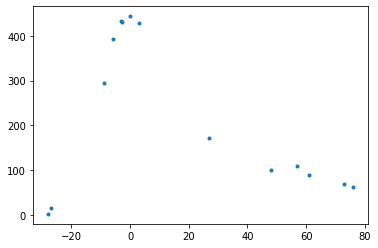

In [20]:
plt.plot(x, f, '.')

In [21]:
p0 = [0] * 7
p0[0] = -4
peakdate = x[np.where(y == min(y))[0]]

if len(peakdate) > 1:
    peakdate = peakdate[0]
p0[1] = peakdate + 5
p0[2] = 10  # sigma

lintail = np.where(x > peakdate + 50)[0]
if len(lintail) < 1:
    print ("no tail data")
    linfit = np.polyfit(x[-2:], y[-2:], 1)
    p0[3] = linfit[1]
    p0[4] = linfit[0]
else:
    linfit = np.polyfit(x[lintail], y[lintail], 1)
    p0[3] = linfit[1]
    p0[4] = linfit[0]
    
p0[5] = 0.1
p0[6] = peakdate - 20

In [22]:
res1 = minimize(nll_VC, p0, 
               args=(np.asarray(x), np.asarray(f), np.asarray(ferr)), method = 'Powell')
#               

# res2 = minimize(nll_lin, p2, 
#                args=(np.asarray(x[x>=cutoff]), np.asarray(f[x>=cutoff]), np.asarray(ferr[x>=cutoff])),method = 'Powell')
# #               bounds=((None,None), (None, None), (0, None), (15, 100), (None, 0)), 

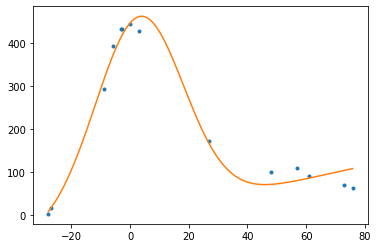

In [23]:
plt.plot(x, f, '.')
plt.plot(t_new, sn_fit(t_new, *res1['x']))
